**IRIS DATASET**

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

SVM with linear kernel:
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


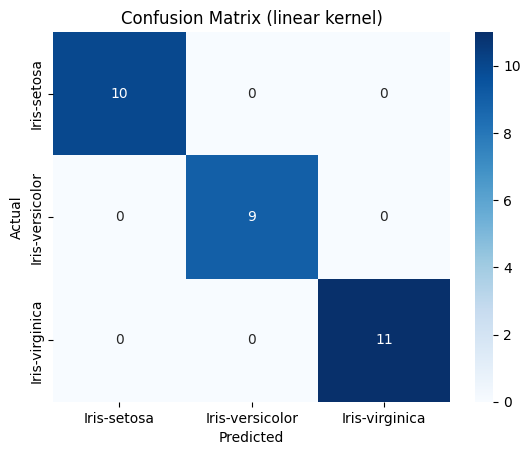


SVM with rbf kernel:
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


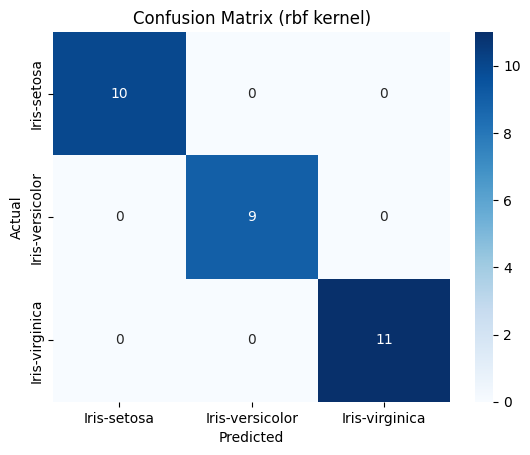

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("iris (3).csv")

# Display first few rows to check structure (optional)
print(df.head())

# Separate features and target
X = df.iloc[:, :-1]  # All columns except last
y = df.iloc[:, -1]   # Last column as target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate SVM with given kernel
def train_evaluate_svm(kernel_type):
    print(f"\nSVM with {kernel_type} kernel:")
    model = SVC(kernel=kernel_type)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Optional: Plot confusion matrix heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix ({kernel_type} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Train and evaluate with linear kernel
train_evaluate_svm("linear")

# Train and evaluate with RBF kernel
train_evaluate_svm("rbf")


**LETTER RECOGNITION**

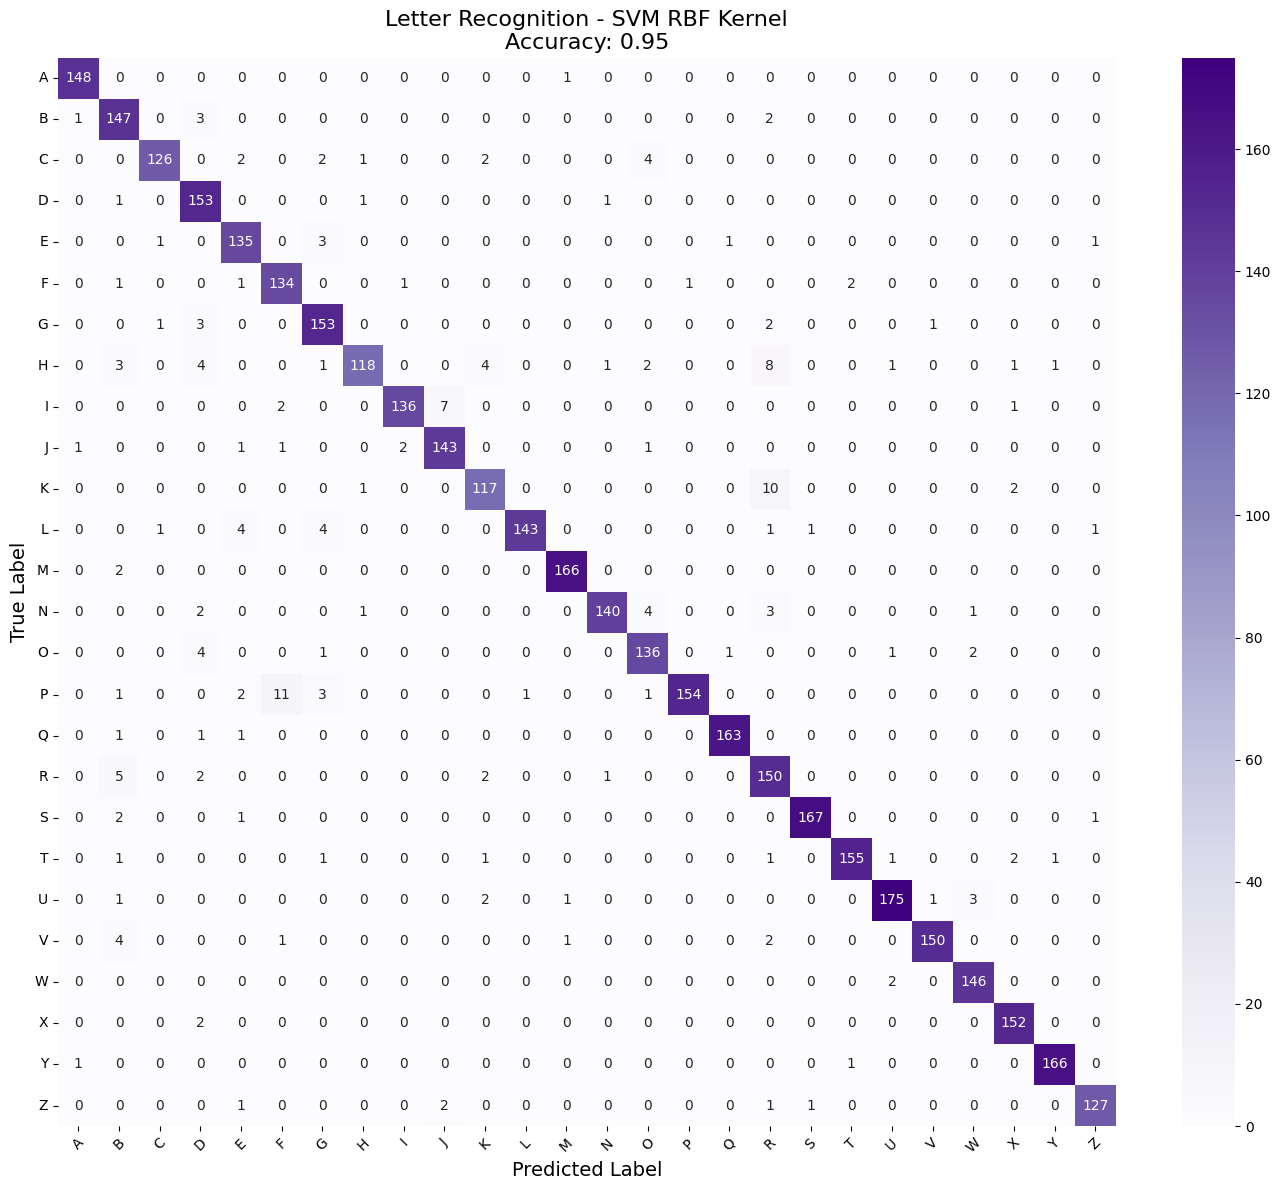

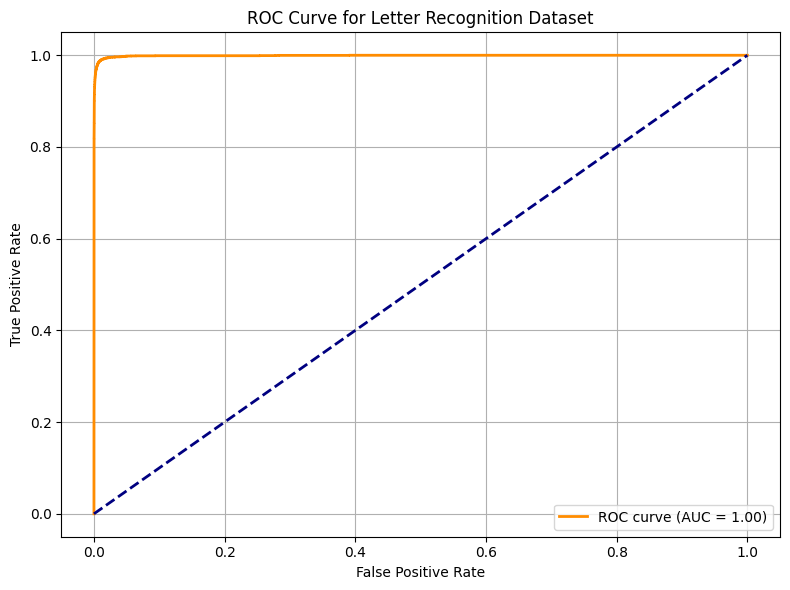

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

letters = pd.read_csv("letter-recognition.csv")

X_letters = letters.drop('letter', axis=1)
y_letters = letters['letter']

label_encoder_letters = LabelEncoder()
y_letters_encoded = label_encoder_letters.fit_transform(y_letters)
class_names_letters = label_encoder_letters.classes_

X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(X_letters, y_letters_encoded, test_size=0.2, random_state=42)

scaler_letters = StandardScaler()
X_train_letters = scaler_letters.fit_transform(X_train_letters)
X_test_letters = scaler_letters.transform(X_test_letters)

svm_letters = SVC(kernel='rbf', probability=True)
svm_letters.fit(X_train_letters, y_train_letters)
y_pred_letters = svm_letters.predict(X_test_letters)

acc_letters = accuracy_score(y_test_letters, y_pred_letters)
cm_letters = confusion_matrix(y_test_letters, y_pred_letters)

plt.figure(figsize=(14, 12))
sns.heatmap(cm_letters, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_letters,
            yticklabels=class_names_letters,
            cbar=True)

plt.title(f'Letter Recognition - SVM RBF Kernel\nAccuracy: {acc_letters:.2f}', fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

y_test_binarized = label_binarize(y_test_letters, classes=np.unique(y_letters_encoded))
y_score = svm_letters.predict_proba(X_test_letters)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
auc_score = roc_auc_score(y_test_binarized, y_score, average='macro')

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()